# Linee Segnalatrici di Probabilità Pluviometrica (LSPP)

Matteo Franzoi - Andrea Rebellato - 2019-03-27

---

In [13]:
import os
from pandas import *
import pandas as pd
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [14]:
pd.set_option('display.max_rows', 10)
data = read_csv('massimePrecipitazioniCenta.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,15min,30min,45min,1h,3h,6h,12h,24h
anno,,,,,,,,
1934,NaN,NaN,NaN,22.6,42.0,56.6,58.8,85.0
1935,NaN,NaN,NaN,17.8,32.6,54.2,63.6,88.0
1936,NaN,NaN,NaN,15.8,28.0,41.4,72.0,85.2
1937,NaN,NaN,NaN,27.8,35.6,38.2,58.4,62.6
1938,NaN,NaN,NaN,15.0,21.4,32.0,56.0,83.0
...,...,...,...,...,...,...,...,...
2000,23.2,33.0,34.8,36.4,42.2,52.8,90.0,120.4
2003,16.2,27.0,34.8,37.4,38.8,62.8,101.0,121.6
2004,25.8,37.4,40.2,42.2,43.0,45.2,57.6,80.4


In [15]:
os.getcwd()

'/media/data/jupyter/esercitazione'

In [16]:
os.listdir()

['.ipynb_checkpoints',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 'abs_ls',  
 'abs_m',  
 'abs_mle',  
 '**best_parameters**',  
 'lsCenta.ipynb',  
 'lsppCenta.ipynb',  
 'massimePrecipitazioniCenta.csv',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb',  
 'pearsonCenta.ipynb']

In [17]:
best = read_pickle('best_parameters')
best

,15min,30min,45min,1h,3h,6h,12h,24h
a,11.511128,15.102191,17.286796,20.077738,30.042461,40.251064,56.917858,76.440792
b,4.257718,5.406040,5.596108,6.560461,9.253392,13.179424,21.080260,24.643281


Con un tempo di ritorno di $10$ anni ci si aspetta un quantile del valore di $0.9$, poiché
$$
\large qu = 1- \dfrac{1}{T_r}
$$

Si definisce la funzione `qtls` che calcola l'inversa della distribuzione di Gumbel in funzione al quantile scelto

In [99]:
def qtls(df, qu):
    rv = gumbel_r(loc = df[h]['a'], scale = df[h]['b'])
    return rv.ppf(qu)

---
## Scrosci

In [109]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q100=1-1/100

def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

pts=DataFrame([[
           qtls(best["15min"],q10),
           qtls(best["30min"],q10),
           qtls(best["45min"],q10)],
          [qtls(best["15min"],q20),
           qtls(best["30min"],q20),
           qtls(best["45min"],q20)],
          [qtls(best["15min"],q100),
           qtls(best["30min"],q100),
           qtls(best["45min"],q100)]], 
              index=[10, 20, 100],columns=[15, 30, 45]).T
pts

,10,20,100
15,21.092559,24.157383,31.097268
30,27.267768,31.159187,39.970784
45,29.880094,33.908329,43.029728


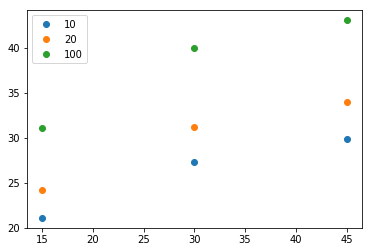

In [110]:
ag=pts.plot(style="o")

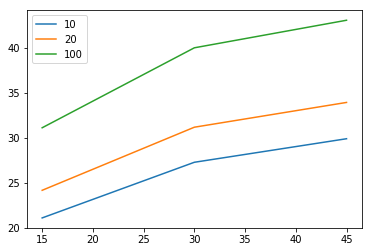

In [111]:
ag=pts.plot(style="-")

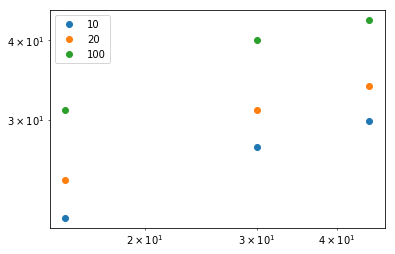

In [112]:
ag=pts.plot(style="o")
ag.set_yscale('log')
ag.set_xscale('log')

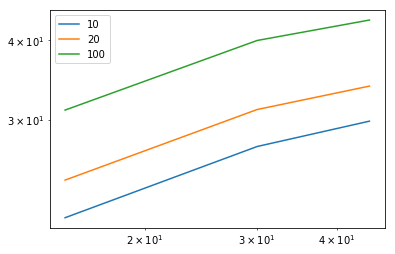

In [113]:
ag=pts.plot(style="-")
ag.set_yscale('log')
ag.set_xscale('log')

In [114]:
in10=np.polyfit(np.log(pts[10].index),np.log(pts[10]),1)
in10[1]=np.exp(in10[1])
in10

array([0.3227668 , 8.87966537])

In [115]:
in20=np.polyfit(np.log(pts[20].index),np.log(pts[20]),1)
in20[1]=np.exp(in20[1])
in20

array([ 0.31494104, 10.39658743])

In [116]:
in100=np.polyfit(np.log(pts[100].index),np.log(pts[100]),1)
in100[1]=np.exp(in100[1])
in100

array([ 0.30278453, 13.84963118])

In [117]:
fnl=DataFrame([in10,in20,in100],index=[10,20,100],columns=["n","a"])
fnl

,n,a
10,0.322767,8.879665
20,0.314941,10.396587
100,0.302785,13.849631


In [126]:
tp=np.linspace(.7,50,100)

In [127]:
def h(tp,a,n):
    return a*tp**n

In [128]:
h10=h(tp,fnl["a"][10],fnl["n"][10])
h20=h(tp,fnl["a"][20],fnl["n"][20])
h100=h(tp,fnl["a"][100],fnl["n"][100])

In [129]:
inh=DataFrame([h10,h20,h100],index=["Tr = 10","Tr = 20","Tr = 100"],
              columns=tp).T
inh

,Tr = 10,Tr = 20,Tr = 100
0.700000,7.914061,9.291928,12.431865
1.197980,9.412771,11.005196,14.628221
1.695960,10.530386,12.278439,16.251808
2.193939,11.442807,13.315468,17.569352
2.691919,12.223803,14.201525,18.691938
...,...,...,...
48.008081,30.979118,35.188900,44.721275
48.506061,31.082474,35.303450,44.861228
49.004040,31.185114,35.417197,45.000182
49.502020,31.287050,35.530156,45.138156


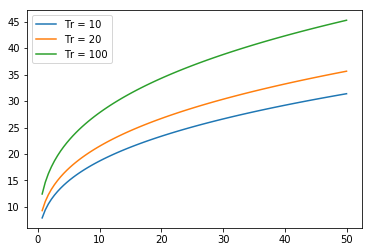

In [130]:
ag=inh.plot()

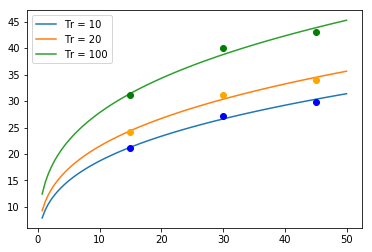

In [132]:
ag=inh.plot()
ag=plt.plot(pts[10],"o",color="blue")
ag=plt.plot(pts[20],"o",color="orange")
ag=plt.plot(pts[100],"o",color="green")

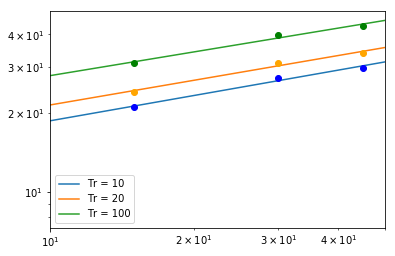

In [137]:
ag=inh.plot()
ag.set_xscale('log')
ag.set_yscale('log')
plt.xlim([10,50])
ag=plt.plot(pts[10],"o",color="blue")
ag=plt.plot(pts[20],"o",color="orange")
ag=plt.plot(pts[100],"o",color="green")

---

## Precipitazioni

e salvandoli in un DataFrame, per 3 diversi tempi di ritorno: 10, 20 e 100 anni.

In [100]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q100=1-1/100

def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

pts=DataFrame([[
           qtls(best["1h"],q10),
           qtls(best["3h"],q10),
           qtls(best["6h"],q10),
           qtls(best["12h"],q10),
           qtls(best["24h"],q10)],
          [qtls(best["1h"],q20),
           qtls(best["3h"],q20),
           qtls(best["6h"],q20),
           qtls(best["12h"],q20),
           qtls(best["24h"],q20)],
          [qtls(best["1h"],q100),
           qtls(best["3h"],q100),
           qtls(best["6h"],q100),
           qtls(best["12h"],q100),
           qtls(best["24h"],q100)]], 
              index=[10, 20, 100],columns=[1, 3, 6, 12, 24]).T
pts

,10,20,100
1,34.841184,39.563586,50.256835
3,50.865991,57.526841,72.609443
6,69.909609,79.396527,100.878382
12,104.356186,119.530345,153.890198
24,131.897226,149.636147,189.803561


## PLOT

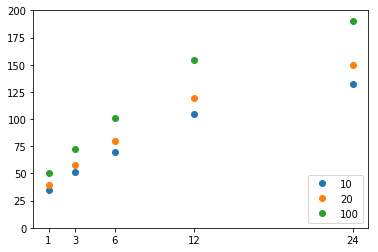

In [57]:
ag = pts.plot(style = 'o')
ag.legend(loc = 4)
plt.ylim([0,200])
ag.set_xticks([1,3,6,12,24])
plt.show()

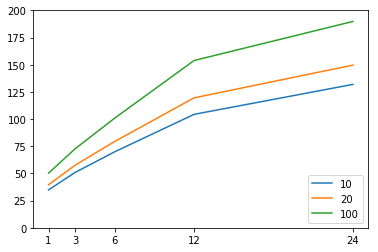

In [56]:
ag = pts.plot(style = '-')
ag.legend(loc = 4)
plt.ylim([0,200])
ag.set_xticks([1,3,6,12,24])
plt.show()

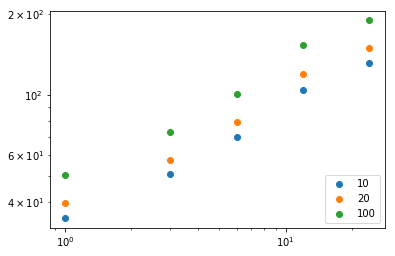

In [50]:
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
#--------------------------------------
ag = pts.plot(style = 'o')
#-------------------------------------
ag.legend(loc = 4)
#plt.ylim([40, 200])
#plt.xlim([.9, 5])
#--------------------------------------
ag.set_yscale('log')
ag.set_xscale('log')
#--------------------------------------
plt.show()

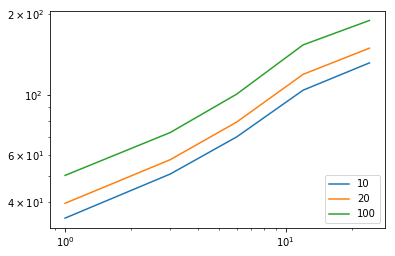

In [51]:
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
#--------------------------------------
ag = pts.plot(style = '-')
#-------------------------------------
ag.legend(loc = 4)
#plt.ylim([40, 200])
#plt.xlim([1, 5])
#--------------------------------------
ag.set_yscale('log')
ag.set_xscale('log')
#--------------------------------------
plt.show()

$$h(t_p, T_r) = a\,\left(T_r\right)\,t_p^n$$  
$$ \log h\left(t_p, T_r\right) = \log a\left(T_r\right) + n\,\log t_p$$

Il logaritmo dell'altezza di precipitazione **h** riferita al tempo di ritorno 10y è

In [59]:
np.log(pts[10])

1     3.550800
3     3.929195
6     4.247203
12    4.647810
24    4.882023
Name: 10, dtype: float64

In [76]:
in10=np.polyfit(np.log(pts[10].index),np.log(pts[10]),1)
in10[1]=np.exp(in10[1])
in10

array([ 0.43358752, 33.43765041])

In [77]:
in20=np.polyfit(np.log(pts[20].index),np.log(pts[20]),1)
in20[1]=np.exp(in20[1])
in20

array([ 0.43487985, 37.914897  ])

In [79]:
in100=np.polyfit(np.log(pts[100].index),np.log(pts[100]),1)
in100[1]=np.exp(in100[1])
in100

array([ 0.43689245, 48.05278   ])

In [80]:
fnl=DataFrame([in10,in20,in100],index=[10,20,100],columns=["n","a"])
fnl

,n,a
10,0.433588,33.437650
20,0.434880,37.914897
100,0.436892,48.052780


In [81]:
tp = np.linspace(.7, 30, 100)

In [82]:
def h(tp, a, n):
    return a*tp**n

In [83]:
h10 = h(tp, fnl['a'][10], fnl['n'][10])
h20 = h(tp, fnl['a'][20], fnl['n'][20])
h100 = h(tp, fnl['a'][100], fnl['n'][100])

In [84]:
inh = pd.DataFrame([
    h10,
    h20,
    h100
], index=["Tr = 10","Tr = 20","Tr = 100"], columns=tp).T
#inh.index = tp
#inh.columns = ['Tr = 10y', 'Tr = 20y', 'Tr = 100y' ]
inh

,Tr = 10,Tr = 20,Tr = 100
0.700000,28.646541,32.467297,41.119045
0.995960,33.379005,37.848201,47.967859
1.291919,37.365088,42.382239,53.742319
1.587879,40.860874,46.359773,58.810395
1.883838,44.003908,49.936813,63.369898
...,...,...,...
28.816162,143.587212,163.522015,208.651984
29.112121,144.224786,164.250274,209.585544
29.408081,144.858699,164.974362,210.513775
29.704040,145.489009,165.694344,211.436760


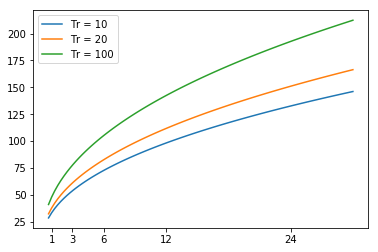

In [87]:
ag = inh.plot()
ag.set_xticks([1,3,6,12,24])
plt.show()

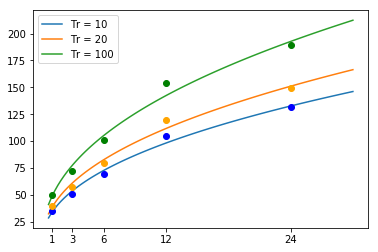

In [96]:
ag = inh.plot()
ag.set_xticks([1,3,6,12,24])
ag = plt.plot(pts[10],"o",color="blue")
ag = plt.plot(pts[20],"o",color="orange")
ag = plt.plot(pts[100],"o",color="green")
plt.show()

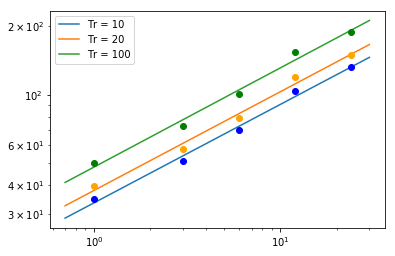

In [98]:
ag = inh.plot()
ag.set_xscale('log')
ag.set_yscale('log')
ag = plt.plot(pts[10],"o",color="blue")
ag = plt.plot(pts[20],"o",color="orange")
ag = plt.plot(pts[100],"o",color="green")
plt.show()